# Ejercicio de clase

In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd
from scipy import optimize

In [7]:
# Función que grafica subplots para cada señal de distribución Erlang
def histograma_vs_densidad(signal:'variable con muestras aleatorias de la distribución generada',
                           f:'función de distribución de probablidad f(x) de la variable aleatoria'):

    plt.figure(figsize=(8,3))
    count, x, _ = plt.hist(signal,100,density=True)
    y = f(x)
    plt.plot(x, y, linewidth=2,color='k')
    plt.ylabel('Probabilidad')
    plt.xlabel('Muestras')
#     plt.legend()
    plt.show()

In [8]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(len(U)))))
    return v

In [9]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,density = True,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()

In [6]:
num_vent = [2,3,4,5,6]
num_dias = [4,7,8,5,1]

data


num_dias  probability  p_acumulada
num_ventas                                    
2                  4         0.16         0.16
3                  7         0.28         0.44
4                  8         0.32         0.76
5                  5         0.20         0.96
6                  1         0.04         1.00

# Transformada inversa

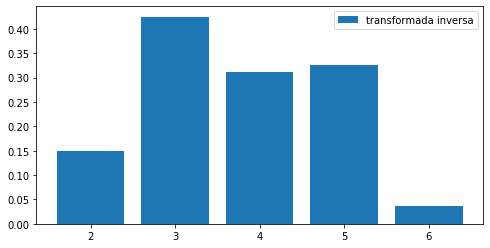

In [13]:
np.random.seed(55)
N = 100


plot_histogram_discrete(m1,'transformada inversa')

## Estimar media


In [14]:
media_teo = np.sum(np.array(num_vent)*data['probability'])
media_teo

3.6800000000000006

 # a) Montecarlo
 

Montecarlo crudi = 3.74


# b) Muestreo estratificado

- 30% de las muestras entre 0 y 0.2
- 40% de las muestras entre 0.2 y 0.8
- 30% de las muestras entre 0.8 y 1

In [23]:
r1 = np.random.uniform(0,0.2,int(0.3*N))
r2 = np.random.uniform(0.2,0.8,int(0.4*N))
r3 = np.random.uniform(0.8,1,int(0.3*N))

r = [r1,r2,r3]
w = [3/2,2/3,3/2]

m2 = list(map(lambda ri:Gen_distr_discreta(ri,data['p_acumulada'])+2,r))
m2 = list(map(lambda xi,wi:xi/wi,m2,w))

print('Estratificado 1 =',np.concatenate(m2).mean())

Estratificado 1 = 3.6516666666666664


# c) Estratificado 2

In [25]:
def estra(B):
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    estra = (U2+i)/B
    return estra

In [26]:


print('Estratificado 2 =',np.mean(m3))


Estratificado 2 = 3.68


# d) complementario


In [30]:

# len(Uc)
print('Complementario =',np.mean(m4))

Complementario = 3.705


# Ejercicio 2
Distribución geométrica (Método de aceptación y rechazo distribuciones discretas)
$$ f(x) = p(1-p)^{x-1}, \quad x\in 1,2,3,4,5,\cdots$$

In [33]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(N:'Cantidad de variables a generar',
                 Dom_f:'Dominio de la función f como tupla (a,b)',
                 f:'función objetivo a generar',
                 max_f:'máximo valor de f'):
    X = np.zeros(N)
    i = 0
    while i<N:
        R1 = np.random.randint(Dom_f[0],Dom_f[1])
        R2 = np.random.uniform(0,max_f)
        if R2<= f(R1):
            X[i] = R1
            i+=1
    return X

In [32]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'= True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label,width=.5)
    plt.legend()
#     plt.show()

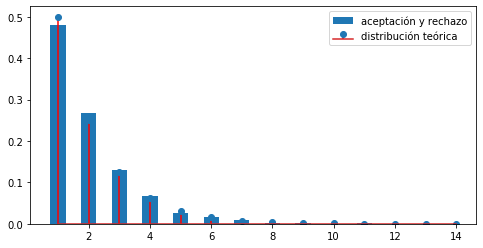

In [38]:
N = 1000
p = 0.5
f_x = lambda x: p*(1-p)**(x-1)
max_f = 1
acep_r = Acep_rechazo(N,(0,15),f_x,max_f)
plot_histogram_discrete(acep_r,'aceptación y rechazo')
x = np.arange(1,15)
plt.stem(x,f_x(x),'r',label='distribución teórica',use_line_collection=True)
plt.legend()
plt.show()

# Ejercicio 
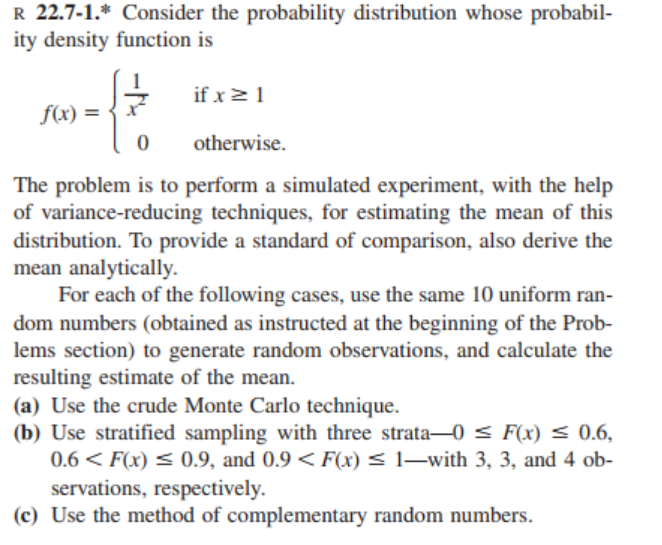

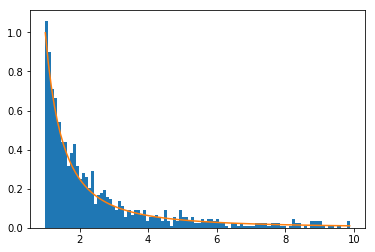

In [19]:
f_x = lambda x: 1/x**2 if x>=1 else 0


 # a) Montecarlo
 

In [38]:
N=10


25.05989612364478


# b) Muestreo estratificado


In [46]:
np.random.seed(100)


In [49]:
muestras2
np.concatenate(estra1).mean()

3.1414011761124687

# c) Estratificado 2

In [51]:
def estra(B):
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    estra = (U2+i)/B
    return estra

In [55]:
rand = estra(10)

np.mean(muestras3)

3.6043778002853335

# d) complementario


7.264034516652442